In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random 

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28 by 28" 
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28 by 28"

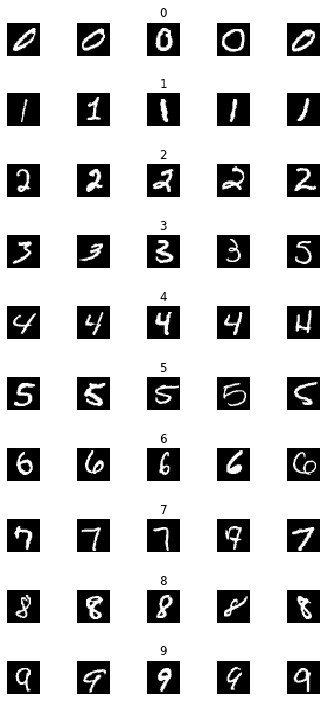

In [6]:
num_of_samples = []
cols = 5 
num_of_classes = 10

fig, axis = plt.subplots(nrows=num_of_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_of_classes):
        x_selected = X_train[y_train == j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap=plt.get_cmap("gray"))
        axis[j][i].axis("off")
        if i == 2:
            axis[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

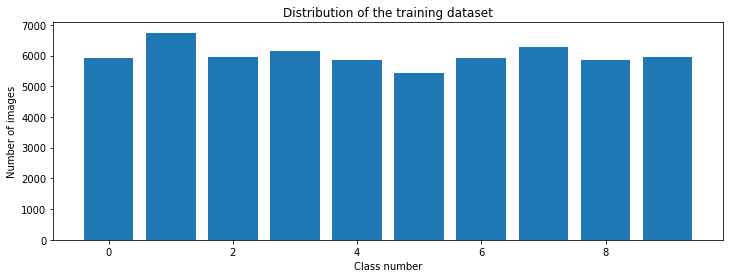

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
#Normalizing the data
X_train = X_train/255
X_test = X_test/255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
 def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model  

In [12]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size = 200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.5398 - accuracy: 0.8311 - val_loss: 0.2622 - val_accuracy: 0.9247
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2961 - accuracy: 0.9136 - val_loss: 0.2319 - val_accuracy: 0.9332
Epoch 3/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2684 - accuracy: 0.9214 - val_loss: 0.2200 - val_accuracy: 0.9360
Epoch 4/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2491 - accuracy: 0.9269 - val_loss: 0.2045 - val_accuracy: 0.9397
Epoch 5/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2370 - accuracy: 0.9306 - val_loss: 0.2134 - val_accuracy: 0.9395
Epoch 6/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.2290 - accuracy: 0.9333 - val_loss: 0.2126 - val_accuracy: 0.9413
Epoch 7/10
54000/54000 [==============================] - 1s 20us/ste

Text(0.5, 0, 'epoch')

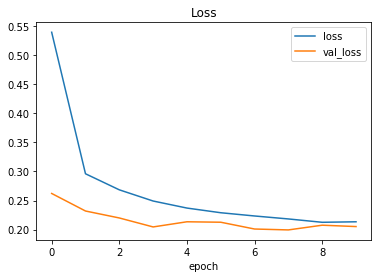

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

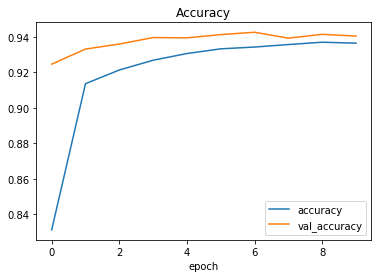

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.24733119205087423
Test Accuracy:  0.9297999739646912


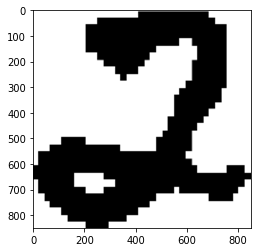

In [18]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

(28, 28)


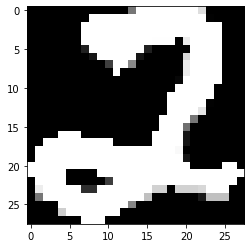

In [22]:
import cv2 

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [24]:
image = image/255
image = image.reshape(1, 784)

In [25]:
prediction = model.predict_classes(image)
print("predicted digit: ", str(prediction))

predicted digit:  [1]
